### 수원 및 수원 인근 소재 대학교

In [10]:
import folium
import pandas as pd
import requests, json
from urllib.parse import quote

In [11]:
college_name_lst = '아주대학교, 동남보건대학, 수원 경기대학교, 수원 성균관대학교, 수원여자대학, 용인 경희대학교, 수원대학교, 수원과학대학'.split(', ')

with open('data/roadapikey.txt') as f:
    road_key = f.read()
    
with open('data/kakaoapikey.txt') as f:
    kakao_key = f.read()

# 주소 정보 URL
addr_url = "https://www.juso.go.kr/addrlink/addrLinkApiJsonp.do"
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10'

# 카카오 위도, 경도 URL
kakao_url = 'https://dapi.kakao.com/v2/local/search/address.json'
kheader = {'Authorization': f'KakaoAK {kakao_key}'}


In [12]:
colleage_addr = []
lat_list, lng_list = [], []

for college in college_name_lst:

    # 주소 가져오기
    params2 = f'keyword={quote(college)}&resultType=json'
    url = f'{addr_url}?{params1}&{params2}'
    addr_res = requests.get(url)

    if addr_res.status_code == 200:
        addr = json.loads(addr_res.text[1:-1])['results']['juso'][0]['roadAddr']
        colleage_addr.append(addr) # 주소 추가
        
        # 위도, 경도 가져와서 추가
        kurl = f'{kakao_url}?query={quote(addr)}'
        kresult = requests.get(kurl, headers=kheader).json()
        
        lat_list.append(float(kresult['documents'][0]['y']))
        lng_list.append(float(kresult['documents'][0]['x']))
    else:
        print(f'Addr Result Code : {addr_res.status_code}')

colleage_addr

['경기도 수원시 영통구 월드컵로 199 (원천동)',
 '경기도 수원시 장안구 천천로74번길 50 (정자동)',
 '경기도 수원시 영통구 광교산로 154-42 (이의동)',
 '경기도 수원시 장안구 서부로 2066 (천천동)',
 '경기도 수원시 권선구 온정로 72 (오목천동)',
 '경기도 용인시 기흥구 덕영대로 1732 (서천동)',
 '경기도 화성시 봉담읍 와우안길 17',
 '경기도 화성시 정남면 세자로 288']

In [13]:
color_list = 'red, green, cyan, purple, lightblue, darkgreen, darkblue, orange'.split(', ')
df = pd.DataFrame({
    '대학명' : list(map(lambda x: x.split()[-1], college_name_lst)),
    '주소' : colleage_addr, 
    '위도' : lat_list, 
    '경도' : lng_list,
    'color' : color_list
})
df.to_csv('data/수원소재대학교.csv', index=False)
df = pd.read_csv('data/수원소재대학교.csv')
df

,대학명,주소,위도,경도,color
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142,red
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000,green
2,경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117,cyan
3,성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209,purple
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동),37.252705,126.963307,lightblue
5,경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199,darkgreen
6,수원대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480,darkblue
7,수원과학대학,경기도 화성시 정남면 세자로 288,37.192033,126.983927,orange


In [16]:
title_html = '<h3 align="center" style="font-size:20px;">수원 및 수원 인근 소재 대학교</h3>'

In [27]:
ccmap = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=12)
for i in df.index:
    folium.CircleMarker(
        location=[df.위도[i], df.경도[i]], 
        popup=folium.Popup(df.주소[i], max_width=200),
        tooltip=df.대학명[i],
        color=df.color[i],
        # icon=folium.Icon(color='green'),
        radius=30, fill=True
    ).add_to(ccmap)

ccmap.get_root().html.add_child(folium.Element(title_html))
ccmap


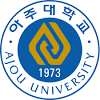
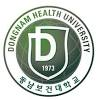
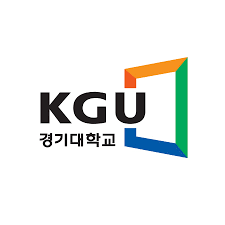
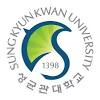
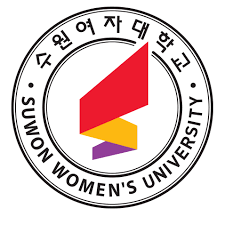
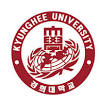
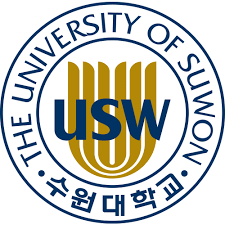
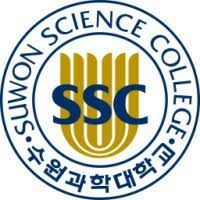

In [26]:
cmap = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=12)

for i in df.index:
    pushpin_col = folium.CustomIcon(f'data/{df.대학명[i]}.png', icon_size=(40, 40))
    folium.Marker(
        location=[df.위도[i], df.경도[i]], 
        popup=folium.Popup(df.주소[i], max_width=200),
        # tooltip=df.대학명[i],
        tooltip=folium.Tooltip(df.대학명[i]),
        icon=pushpin_col
    ).add_to(cmap)

cmap.get_root().html.add_child(folium.Element(title_html))
cmap